# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
def parse_data(data: pd.DataFrame):
    """
    Parse data from data frame
    """
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i, :, :, 0] = image / 255

    return image_array, image_label

In [10]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [12]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [13]:
## parsing data here
images, labels = parse_data(df)

In [14]:
images.shape

(35887, 48, 48, 1)

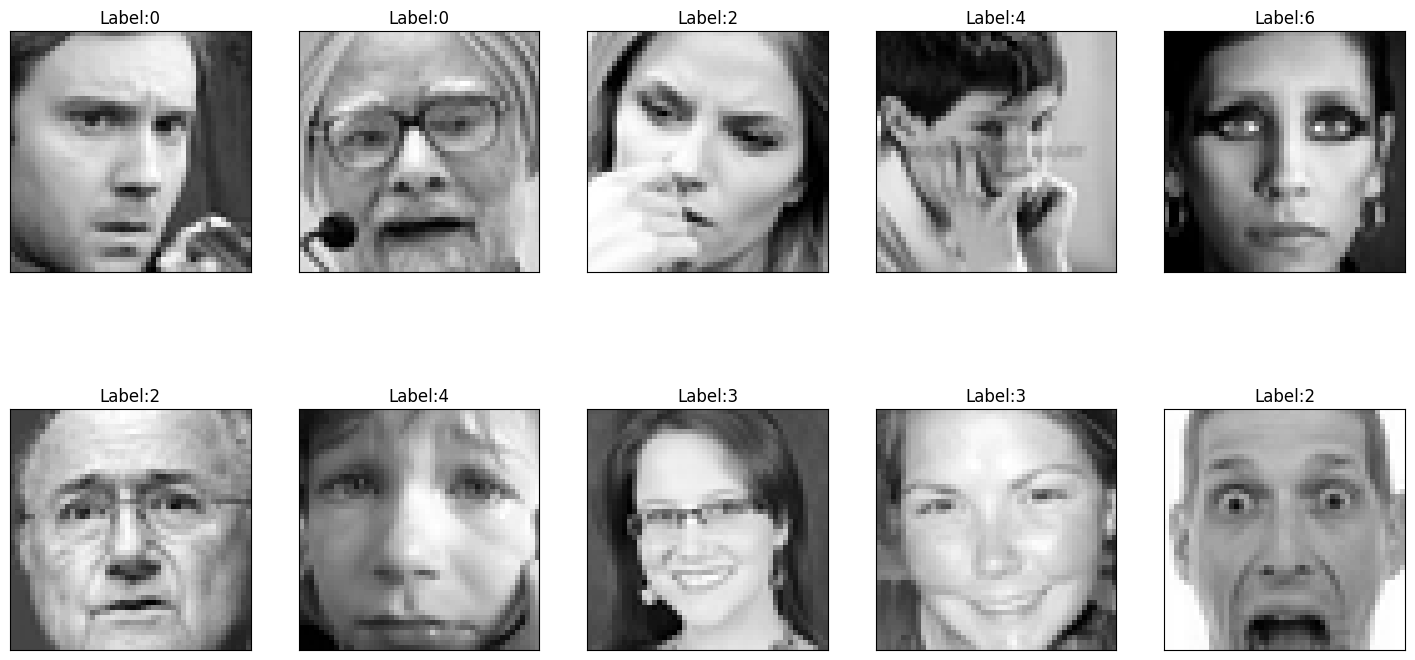

In [15]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [16]:
from sklearn.decomposition import PCA

reshaped_images = images.reshape(images.shape[0], -1)
pca = PCA(n_components = 2)
pca.fit(reshaped_images)
images_pca = pca.transform(reshaped_images)
# pca.fit(images) ## modify images' array to the appropriate shape

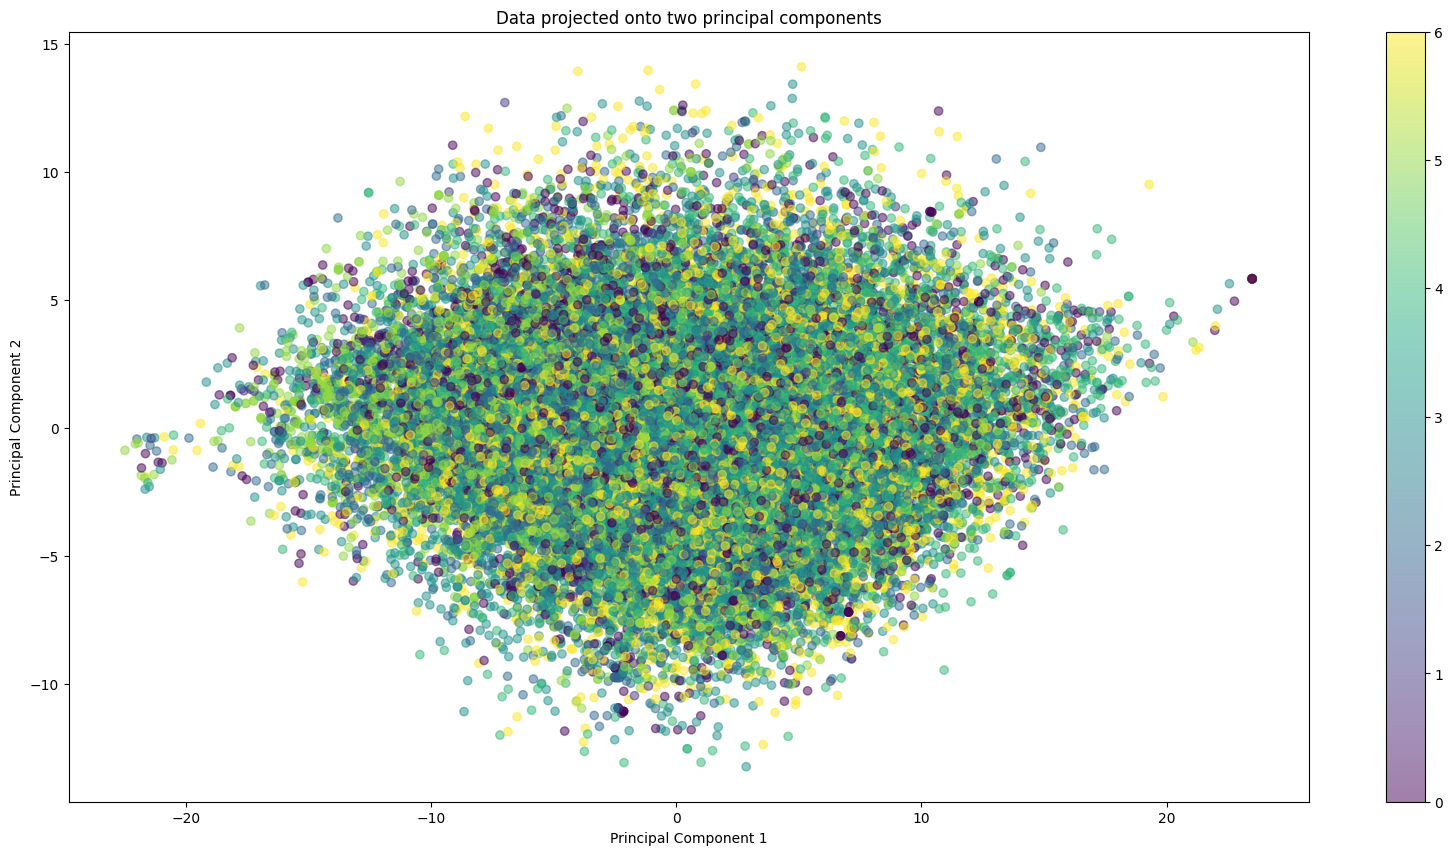

In [17]:
# transform for visualizing here
# images_pca=pca.transform(images)
# modify images' array to the appropriate shape
# images_pca.shape

reshaped_images = images.reshape(images.shape[0], -1)

# Áp dụng PCA
pca = PCA(n_components=2)
images_pca = pca.fit_transform(reshaped_images)

# Hiển thị dữ liệu đã được chiếu
plt.figure(figsize = (20, 10))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data projected onto two principal components')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

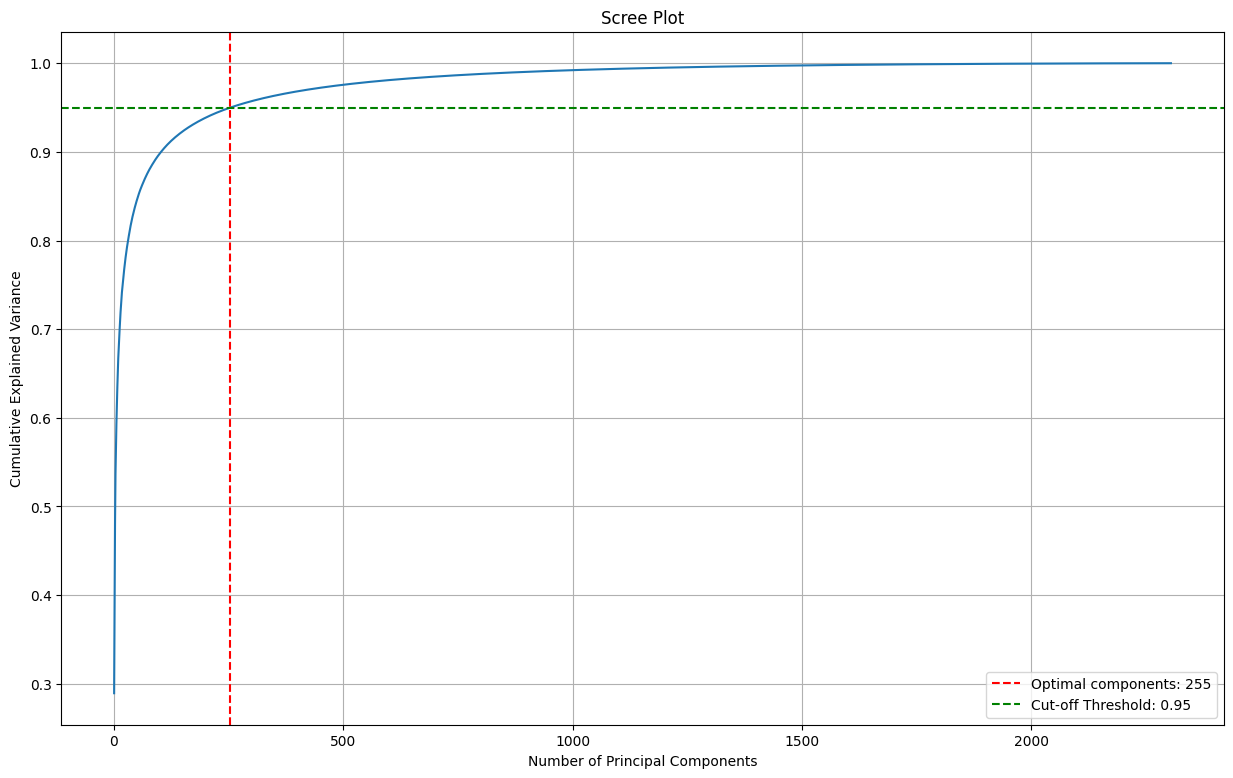

Optimal number of components: 255


In [18]:
## determine the optimal number of PCs here
## pca.explained_variance_()

pca = PCA()
pca.fit(reshaped_images)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Threshold
threshold = 0.95

# Lấy explained_variance_
explained_variance = pca.explained_variance_

# Find Optimal components
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
# Elbow
plt.figure(figsize=(15, 9))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axvline(n_components - 1, color='r', linestyle='--', label=f'Optimal components: {n_components}')
plt.axhline(y = 0.95, color='g', linestyle='--', label=f'Cut-off Threshold: {threshold}')
plt.legend()
plt.grid(True)
plt.show()


# Print Optimal components
print("Optimal number of components:", n_components)

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
## splitting data into train/val/test subsets here
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(reshaped_images, labels,
                                                    shuffle = True, test_size = 0.2, random_state = 42)

###MLP Model with original data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(max_iter = 1000, random_state = 42)

param_grid = {
    'hidden_layer_sizes': [(50, ), (100, ), (200, )],
    'alpha': [0.1, 0.01, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameter: ", grid_search.best_params_)
best_mlp_model = grid_search.best_estimator_

Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best parameter:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}


#### Predict with test set, the performance of model

In [ ]:
y_test_pred = best_mlp_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.33      0.32      0.33       985
           1       0.56      0.38      0.45       102
           2       0.35      0.33      0.34      1043
           3       0.56      0.61      0.58      1765
           4       0.33      0.34      0.34      1210
           5       0.58      0.57      0.58       795
           6       0.39      0.38      0.39      1278

    accuracy                           0.44      7178
   macro avg       0.44      0.42      0.43      7178
weighted avg       0.43      0.44      0.43      7178



### MLP Model with data transform by PCA

In [20]:
from sklearn.model_selection import train_test_split

# Original data transform by PCA
reshaped_images = images.reshape(images.shape[0], -1)
pca = PCA(n_components = n_components)
pca.fit(reshaped_images)
images_pca = pca.transform(reshaped_images)

# Split dataset into train set and test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(images_pca, labels,
                                                                    shuffle = True, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

mlp = MLPClassifier(max_iter = 1000, random_state = 42)

param_grid = {
    'hidden_layer_sizes': [(200, )],
    'alpha': [0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train_pca)

print("Best parameter: ", grid_search.best_params_)
best_mlp_model_pca = grid_search.best_estimator_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameter:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}


#### Predict with train set, the performance of model

In [29]:
y_test_pred_pca = best_mlp_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.29      0.27      0.28       985
           1       0.31      0.36      0.33       102
           2       0.33      0.33      0.33      1043
           3       0.52      0.53      0.53      1765
           4       0.30      0.31      0.30      1210
           5       0.53      0.53      0.53       795
           6       0.35      0.34      0.35      1278

    accuracy                           0.39      7178
   macro avg       0.38      0.38      0.38      7178
weighted avg       0.39      0.39      0.39      7178



## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
import seaborn as sns

### Model Performance with Original Data and Confusion Matrix

In [ ]:
## visualize the confusion matrices and classification reports here
y_test_pred = best_mlp_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.33      0.32      0.33       985
           1       0.56      0.38      0.45       102
           2       0.35      0.33      0.34      1043
           3       0.56      0.61      0.58      1765
           4       0.33      0.34      0.34      1210
           5       0.58      0.57      0.58       795
           6       0.39      0.38      0.39      1278

    accuracy                           0.44      7178
   macro avg       0.44      0.42      0.43      7178
weighted avg       0.43      0.44      0.43      7178



In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 320    8  118  145  190   52  152]
 [  15   39    9   13   13    4    9]
 [ 115    9  347  155  183   93  141]
 [ 151    2  126 1069  171   76  170]
 [ 174    6  155  202  413   46  214]
 [  54    1   93   76   60  454   57]
 [ 149    5  131  240  210   59  484]]


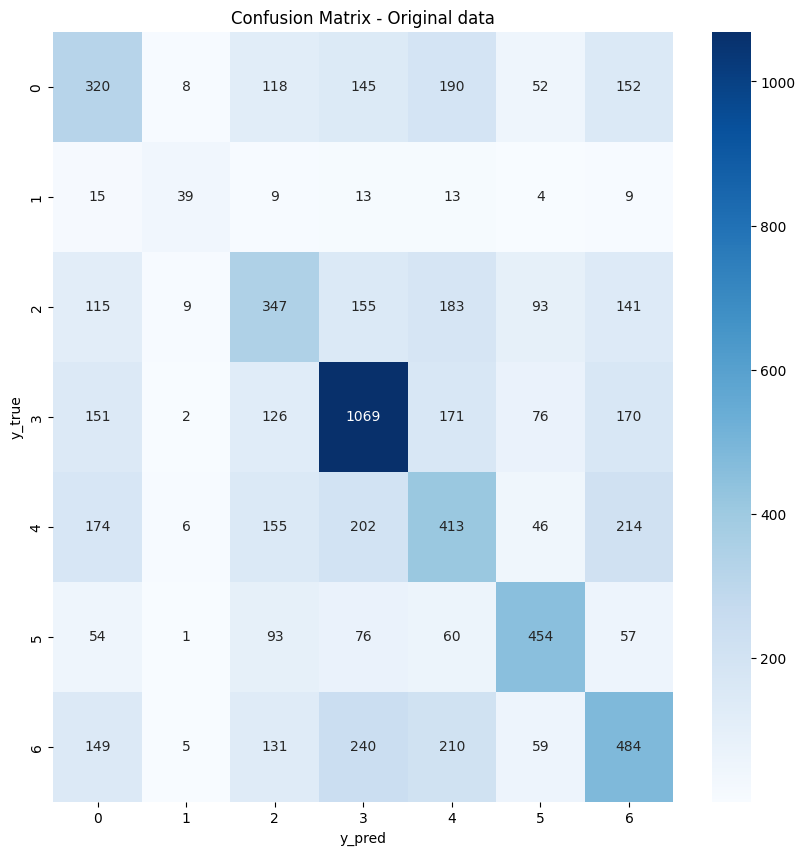

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('Confusion Matrix - Original data')
plt.show()

### Model Performance with Transform (PCA) Data and Confusion Matrix

In [ ]:
## visualize the confusion matrices and classification reports here
y_test_pred_pca = best_mlp_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.31      0.30      0.31       985
           1       0.48      0.27      0.35       102
           2       0.31      0.28      0.29      1043
           3       0.54      0.58      0.56      1765
           4       0.32      0.33      0.33      1210
           5       0.53      0.55      0.54       795
           6       0.39      0.38      0.39      1278

    accuracy                           0.41      7178
   macro avg       0.41      0.39      0.39      7178
weighted avg       0.41      0.41      0.41      7178



In [ ]:
cm = confusion_matrix(y_test_pca, y_test_pred_pca)
print(cm)

[[ 296    4  124  167  180   69  145]
 [  14   28   17   14   15    3   11]
 [ 122    4  290  158  207  111  151]
 [ 139    8  128 1025  189   79  197]
 [ 177    6  168  200  405   56  198]
 [  45    2   83   94   68  434   69]
 [ 147    6  129  247  198   62  489]]


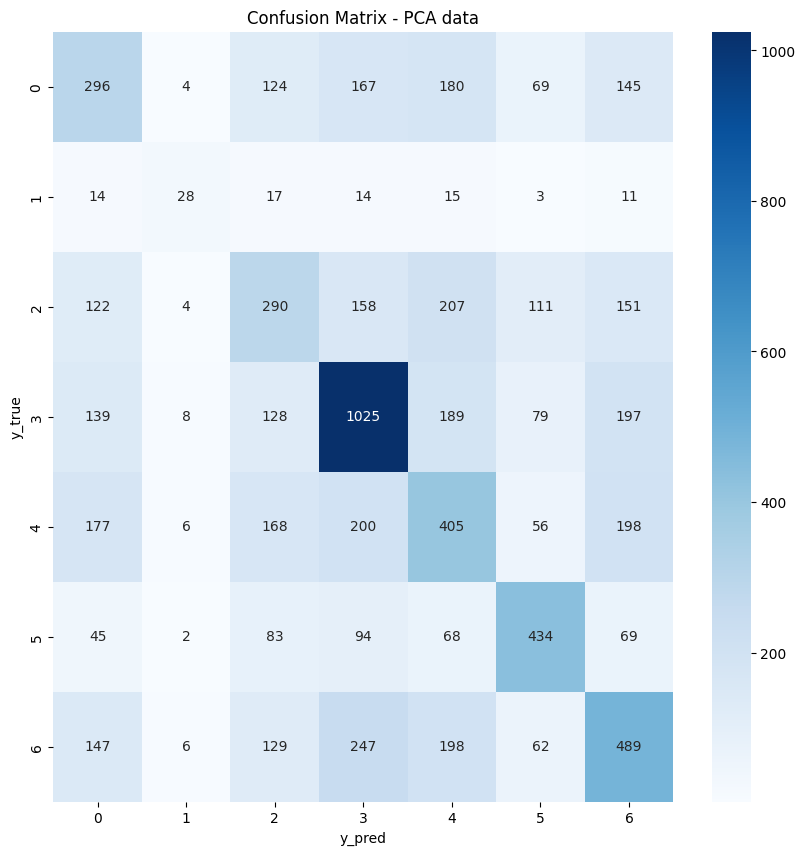

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('Confusion Matrix - PCA data')
plt.show()